In [1]:
from __future__ import print_function

import os
import gzip
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
class MNIST(object):
    
    def __init__(self, image_filename, label_filename, basedir=os.sep.join([os.getenv("HOME"), "data"])):
        self.num_examples = None
        self.load_labels( os.sep.join([basedir, label_filename]) )
        self.load_images( os.sep.join([basedir, image_filename]) )
    
    def _onehot(self):
        idx_offset = np.arange( self.num_examples ) * self.nclass
        self.onehot = np.zeros( (self.num_examples, self.nclass) )
        self.onehot.flat[ idx_offset + self.labels.ravel() ] = 1
    
    def _normalise(self):
        self.images = self.images.astype( np.float32 ) / 256.
    
    def load_labels(self, fn):
        with gzip.open(fn, "rb") as fp:
            data = fp.read()
        magic, n = np.frombuffer( data[:8], dtype=np.dtype( ">i4" ) )
        assert magic == 2049, "Incorrect magic!"
        if self.num_examples is not None:
            assert self.num_examples == n, "Incorrect file length!"
        self.num_examples = n
        self.labels = np.frombuffer( data[8:], dtype=np.int8 )
        self.nclass = len( list( set( self.labels ) ) )
        self._onehot()
    
    def load_images(self, fn):
        with gzip.open(fn, "rb") as fp:
            data = fp.read()
        magic, n, sx, sy = np.frombuffer( data[:16], dtype=np.dtype( ">i4" ) )
        assert magic == 2051, "Incorrect magic!"
        if self.num_examples is not None:
            assert self.num_examples == n, "Incorrect file length!"
        self.num_examples = n
        self.sx, self.sy = sx, sy
        self.images = np.frombuffer( data[16:], dtype=np.uint8 ).reshape( (self.num_examples, sx*sy) )
        self._normalise()

In [47]:
train = MNIST( "train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz" )

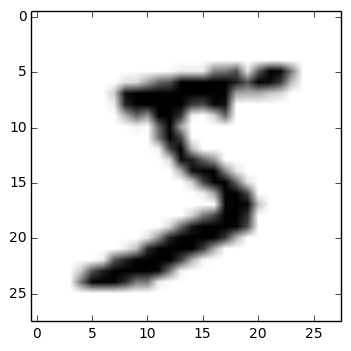

In [48]:
plt.imshow( train.images[0].reshape( (28,28) ), cmap=plt.cm.gray_r )

In [49]:
train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  